#Downloading Data

In [ ]:
%%capture
!pip install ipython-autotime
%load_ext autotime

time: 1.1 ms (started: 2025-05-04 14:34:56 +00:00)


In [1]:
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_path = '/content/drive/My Drive/DS Final Project/enron_clean_emails.pkl'
df_from_drive = pd.read_pickle(save_path)
df_from_drive.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body,user,Subject_new,body_new
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,2001-05-14 16:39:00-07:00,phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p,,Here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p,,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,2000-10-18 03:00:00-07:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,1.0,text/plain; charset=us-ascii,7bit,...,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p,test,test successful way to go
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p,,Randy Can you send me a schedule of the salary...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,2000-08-31 05:07:00-07:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,1.0,text/plain; charset=us-ascii,7bit,...,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p,Hello,Lets shoot for Tuesday at


time: 59.8 s (started: 2025-03-29 13:18:53 +00:00)


#Cleaning The Data-Set

In [ ]:
import re

time: 262 µs (started: 2025-03-29 13:20:15 +00:00)


In [ ]:
def remove_replies(text):
    return re.split(r'(\nFrom:|\nSent:|\nTo:|\nSubject:)', text)[0]
df_from_drive['body_clean'] = df_from_drive['body_new'].apply(remove_replies)

time: 1.09 s (started: 2025-03-29 13:20:15 +00:00)


In [ ]:
signature_patterns = ['best regards', 'thanks', 'sincerely', 'cheers', 'kind regards']
def remove_signatures(text):
    for phrase in signature_patterns:
        text = text.lower().split(phrase)[0]
    return text
df_from_drive['body_clean'] = df_from_drive['body_clean'].apply(remove_signatures)

time: 7.17 s (started: 2025-03-29 13:20:16 +00:00)


In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stopwords = set(ENGLISH_STOP_WORDS)

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stopwords])

df_from_drive['body_clean'] = df_from_drive['body_clean'].apply(remove_stopwords)


time: 18 s (started: 2025-03-29 13:20:23 +00:00)


In [ ]:
df_from_drive = df_from_drive[df_from_drive['body_clean'].str.len() > 30]  # remove very short messages

time: 561 ms (started: 2025-03-29 13:20:41 +00:00)


In [ ]:
def remove_urls(text):
    return re.sub(r'http[s]?://\S+|www\.\S+|http\w*\S*|www\w*\S*', '', text)

df_from_drive['body_clean'] = df_from_drive['body_clean'].apply(remove_urls)

time: 6.23 s (started: 2025-03-29 13:20:42 +00:00)


<ipython-input-26-a6fd8d1414f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_from_drive['body_clean'] = df_from_drive['body_clean'].apply(remove_urls)


In [ ]:
df_from_drive = df_from_drive[~df_from_drive['body_clean'].str.contains('aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', case=False, na=False)]

time: 5.62 s (started: 2025-03-29 13:20:48 +00:00)


In [ ]:
df_from_drive.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,body,user,Subject_new,body_new,body_clean
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,2001-05-04 13:51:00-07:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p,,Traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,2000-10-23 06:13:00-07:00,phillip.allen@enron.com,randall.gay@enron.com,,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p,,Randy Can you send me a schedule of the salary...,randy send schedule salary level scheduling gr...
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...,<16254169.1075863688286.JavaMail.evans@thyme>,2000-08-22 07:44:00-07:00,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Please cc the following distribution list with...,allen-p,,Please cc the following distribution list with...,cc following distribution list updates phillip...
8,allen-p/_sent_mail/101.,Message-ID: <20641191.1075855687472.JavaMail.e...,<20641191.1075855687472.JavaMail.evans@thyme>,2000-10-17 02:26:00-07:00,phillip.allen@enron.com,mark.scott@enron.com,Re: High Speed Internet Access,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,1. login: pallen pw: ke9davis\n\n I don't thi...,allen-p,High Speed Internet Access,login pallen pw kedavis I dont think these are...,login pallen pw kedavis dont think required is...
9,allen-p/_sent_mail/102.,Message-ID: <30795301.1075855687494.JavaMail.e...,<30795301.1075855687494.JavaMail.evans@thyme>,2000-10-16 06:44:00-07:00,phillip.allen@enron.com,zimam@enron.com,FW: fixed forward or other Collar floor gas pr...,1.0,text/plain; charset=us-ascii,7bit,...,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,---------------------- Forwarded by Phillip K ...,allen-p,FW fixed forward or other Collar floor gas pri...,Forwarded by Phillip K AllenHOUECT on PM Buckn...,forwarded phillip k allenhouect pm buckner buc...


time: 61.3 ms (started: 2025-03-29 13:20:54 +00:00)


#Bert On Data-Set

In [ ]:
print(len(df_from_drive))

470676
time: 499 µs (started: 2025-03-26 12:50:54 +00:00)


In [ ]:
sample_df = df_from_drive.sample(n=20000, random_state=42)

time: 160 ms (started: 2025-03-26 12:50:56 +00:00)


In [ ]:
sample_df = sample_df.reset_index(drop=True)
docs = sample_df['Subject_new'].fillna('') + ' ' + sample_df['body_clean'].fillna('')

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

##Embedding

In [ ]:
from sentence_transformers import SentenceTransformer
import torch
from bertopic import BERTopic
import pandas as pd

time: 58.2 s (started: 2025-05-04 14:37:39 +00:00)


In [ ]:
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

time: 4.75 ms (started: 2025-05-04 14:38:37 +00:00)


Initlize SentenceTransformer model with the pre-trained model.

In [ ]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2", device=device)

Initialize BERTopic for topic modeling with a minimum topic size of 35 documents per topic.

In [ ]:
embedding_topic_model = BERTopic(embedding_model=embedding_model, min_topic_size=35)
topics_embed, probs_embed = embedding_topic_model.fit_transform(docs)

time: 1min 8s (started: 2025-03-26 12:51:10 +00:00)


In [ ]:
print(len(topics_embed), len(sample_df))

20000 20000
time: 624 µs (started: 2025-03-26 12:52:45 +00:00)


 Reduce the number of topics to 20, transforms the docs.

In [ ]:
embedding_topic_model = embedding_topic_model.reduce_topics(docs, nr_topics=20)
topics_embed, _ = embedding_topic_model.transform(docs)

sample_df['topic_embed'] = pd.Series(topics_embed).astype(int)

time: 40.5 s (started: 2025-03-26 12:52:47 +00:00)


Show results on the df.

In [ ]:
sample_df['topic_embed'] = topics_embed
topic_info_embed = embedding_topic_model.get_topic_info()
print(topic_info_embed)

    Topic  Count                                  Name  \
0      -1  12523             -1_subject_pm_email_enron   
1       0   1292           0_meeting_feedback_vince_pm   
2       1   1111        1_agreement_expense_subject_cc   
3       2    933       2_original_sent_message_subject   
4       3    889      3_power_energy_california_market   
5       4    482               4_deal_meter_deals_kate   
6       5    446           5_enron_said_company_enrons   
7       6    370                 6_email_subject_fw_pm   
8       7    346  7_dbcapsdata_hourahead_hour_database   
9       8    266         8_fax_phone_perlingiere_smith   
10      9    259            9_sat_outages_scheduled_ct   
11     10    235               10_game_updated_wr_week   
12     11    214            11_tofrom_travel_way_fares   
13     12    183   12_request_password_resource_access   
14     13    130      13_charts_carr_futures_contained   
15     14     86    14_risk_var_management_operational   
16     15     

In [ ]:
sample_df[sample_df['topic_embed'] == -1][['Subject_new', 'body_clean']].sample(10)

,Subject_new,body_clean
515,Calif Consumer Responds to Enrons Q Earnings,fyi attached email came pr unsolicited check c...
7155,Power Questions for Meeting,stacey attached list questions like discuss me...
18155,FW CMS Opportunity,fyi original message jafry rahil sent monday m...
2319,IMPORTANT Stack Manager Users,process confirming traders set correctly ready...
12092,ENA Power Org Chart,forward govt affairs group enron north america...
5585,language for Withholding Section,just info forwarded kay manncorpenron pm jeff ...
15838,TVA Issued RFP for peaking power,kevin shouldnt participate rfp regards delaine...
1968,Op Ed satire,forward ed feel appropriate forwarded steven j...
5739,Infocasts Valuing Electric Power Assets and Co...,good morning sorry hear able join know anybody...
1191,ENA OrientationWhy dont you and Kathleen plan ...,hi kathleen try charge think department picks ...


time: 39.9 ms (started: 2025-03-26 12:54:04 +00:00)


##Labeling

Drop all rows where the topic is -1, the outliers.


In [ ]:
sample_df = sample_df[sample_df['topic_embed'] != -1]

time: 126 ms (started: 2025-03-26 12:57:48 +00:00)


Assign the topics titles.

In [ ]:
topic_map = {
    0: "Meeting Feedback",
    1: "Agreement / Expense / Subject",
    2: "Original Sent / Message",
    3: "Power / Energy California Market",
    4: "Deal / Meter / Deals",
    5: "Company News",
    6: "Forwarded Emails",
    7: "Hour-Ahead Market / Hour Database",
    8: "Fax / Phone Communication",
    9: "Outages / Scheduled Maintenance",
    10: "Game Updates / Sports",
    11: "Travel / Fares",
    12: "Password / Resource Access Requests",
    13: "Charts / Futures / Market Reports",
    14: "Risk / Management Operations",
    15: "Published Notifications / Updates",
    16: "Books / Requests",
    17: "Blackberry / Wireless Communication",
    18: "Election Vote",
}


time: 380 µs (started: 2025-05-04 14:38:37 +00:00)


In [ ]:
sample_df['topic_label'] = sample_df['topic_embed'].map(topic_map)

time: 2.51 ms (started: 2025-03-26 13:07:46 +00:00)


In [ ]:
sample_df.head()

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-Folder,X-Origin,X-FileName,body,user,Subject_new,body_new,body_clean,topic_embed,topic_label
0,taylor-m/all_documents/1385.,Message-ID: <15693884.1075859910830.JavaMail.e...,<15693884.1075859910830.JavaMail.evans@thyme>,2000-02-24 12:21:00-08:00,paul.simons@enron.com,"katja.schilling@enron.com, simon.brooks@enron....",Protecting Confidential Information,1.0,text/plain; charset=us-ascii,7bit,...,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,Taylor-M,mtaylor.nsf,The exciting cocktail of credit derivatives an...,taylor-m,Protecting Confidential Information,The exciting cocktail of credit derivatives an...,exciting cocktail credit derivatives enron onl...,14,Risk / Management Operations
3,mann-k/all_documents/1292.,Message-ID: <32686019.1075845606742.JavaMail.e...,<32686019.1075845606742.JavaMail.evans@thyme>,2000-10-08 13:13:00-07:00,kay.mann@enron.com,"nmann@erac.com, suzanne.adams@enron.com",MANN - INV/ITIN & UPGRD,1.0,text/plain; charset=us-ascii,7bit,...,\Kay_Mann_June2001_1\Notes Folders\All documents,MANN-K,kmann.nsf,---------------------- Forwarded by Kay Mann/C...,mann-k,MANN INVITIN UPGRD,Forwarded by Kay MannCorpEnron on PM Claudette...,forwarded kay manncorpenron pm claudette harve...,11,Travel / Fares
5,may-l/inbox/633.,Message-ID: <7780320.1075845250294.JavaMail.ev...,<7780320.1075845250294.JavaMail.evans@thyme>,2001-05-20 17:36:24-07:00,40enron@enron.com,None,Frank Gehry Architect Exhibition,1.0,text/plain; charset=us-ascii,7bit,...,"\May, Larry\May, Larry\Inbox",MAY-L,"May, Larry.pst",\nAfter much success last year with our AskWhy...,may-l,Frank Gehry Architect Exhibition,After much success last year with our AskWhy a...,success year askwhy advertising campaign publi...,5,Company News
6,mann-k/sent/99.,Message-ID: <13893972.1075845920905.JavaMail.e...,<13893972.1075845920905.JavaMail.evans@thyme>,2000-06-20 07:24:00-07:00,kay.mann@enron.com,matthew.gockerman@enron.com,Hub Agency Agreement,1.0,text/plain; charset=us-ascii,7bit,...,\Kay_Mann_June2001_3\Notes Folders\Sent,MANN-K,kmann.nsf,"We are very early in the process on this one, ...",mann-k,Hub Agency Agreement,We are very early in the process on this one s...,early process havent missed opportunities kay ...,1,Agreement / Expense / Subject
11,blair-l/meetings/1009.,Message-ID: <585273.1075853047894.JavaMail.eva...,<585273.1075853047894.JavaMail.evans@thyme>,2001-06-27 16:02:00-07:00,outlook.team@enron.com,None,Estalee,1.0,text/plain; charset=us-ascii,7bit,...,"\LBLAIR (Non-Privileged)\Blair, Lynn\Meetings",Blair-L,LBLAIR (Non-Privileged).pst,CALENDAR ENTRY:\tAPPOINTMENT\n\nDescription:\n...,blair-l,Estalee,CALENDAR ENTRY APPOINTMENT Description Estalee...,calendar entry appointment description estalee...,0,Meeting Feedback


time: 17.2 ms (started: 2025-03-26 12:59:40 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 2.29 s (started: 2025-03-26 13:07:59 +00:00)


In [ ]:
save_path = '/content/drive/My Drive/DS Final Project/sample_subjects.pkl'
sample_df.to_pickle(save_path)

time: 433 ms (started: 2025-03-26 13:08:59 +00:00)


##Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

time: 734 ms (started: 2025-05-04 14:38:37 +00:00)


Uplode from drive if needed

In [3]:
drive.mount('/content/drive')
subject_path = '/content/drive/My Drive/DS Final Project/sample_subjects.pkl'
sample_df = pd.read_pickle(subject_path)
sample_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,...,X-Folder,X-Origin,X-FileName,body,user,Subject_new,body_new,body_clean,topic_embed,topic_label
0,taylor-m/all_documents/1385.,Message-ID: <15693884.1075859910830.JavaMail.e...,<15693884.1075859910830.JavaMail.evans@thyme>,2000-02-24 12:21:00-08:00,paul.simons@enron.com,"katja.schilling@enron.com, simon.brooks@enron....",Protecting Confidential Information,1.0,text/plain; charset=us-ascii,7bit,...,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,Taylor-M,mtaylor.nsf,The exciting cocktail of credit derivatives an...,taylor-m,Protecting Confidential Information,The exciting cocktail of credit derivatives an...,exciting cocktail credit derivatives enron onl...,0,Meeting Feedback
1,scott-s/gir/212.,Message-ID: <1898859.1075846711332.JavaMail.ev...,<1898859.1075846711332.JavaMail.evans@thyme>,2000-07-11 01:47:00-07:00,susan.scott@enron.com,"gsullivan@sempra.com, hayley@turn.org, alan_re...",Transwestern Opening Brief,1.0,text/plain; charset=us-ascii,7bit,...,\Susan_Scott_Dec2000_June2001_1\Notes Folders\Gir,SCOTT-S,sscott3.nsf,Attached is Transwestern Pipeline Company's Op...,scott-s,Transwestern Opening Brief,Attached is Transwestern Pipeline Companys Ope...,attached transwestern pipeline companys openin...,0,Meeting Feedback
2,mann-k/sent/1191.,Message-ID: <15776906.1075845946776.JavaMail.e...,<15776906.1075845946776.JavaMail.evans@thyme>,2000-10-24 05:40:00-07:00,kay.mann@enron.com,bob.joyce@kvaerner.com,,1.0,text/plain; charset=us-ascii,7bit,...,\Kay_Mann_June2001_3\Notes Folders\Sent,MANN-K,kmann.nsf,"Bob,\n\nMy donor number is 1181819.\n\nLet me ...",mann-k,,Bob My donor number is Let me know if Michael ...,bob donor number let know michael needs know d...,0,Meeting Feedback
3,mann-k/all_documents/1292.,Message-ID: <32686019.1075845606742.JavaMail.e...,<32686019.1075845606742.JavaMail.evans@thyme>,2000-10-08 13:13:00-07:00,kay.mann@enron.com,"nmann@erac.com, suzanne.adams@enron.com",MANN - INV/ITIN & UPGRD,1.0,text/plain; charset=us-ascii,7bit,...,\Kay_Mann_June2001_1\Notes Folders\All documents,MANN-K,kmann.nsf,---------------------- Forwarded by Kay Mann/C...,mann-k,MANN INVITIN UPGRD,Forwarded by Kay MannCorpEnron on PM Claudette...,forwarded kay manncorpenron pm claudette harve...,0,Meeting Feedback
4,campbell-l/personnal/39.,Message-ID: <514350.1075863665750.JavaMail.eva...,<514350.1075863665750.JavaMail.evans@thyme>,2000-06-28 11:39:00-07:00,office.chairman@enron.com,esop.america@enron.com,EnronOptions - Your Stock Option Program,1.0,text/plain; charset=ANSI_X3.4-1968,quoted-printable,...,\Larry_Campbell_Nov2001_1\Notes Folders\Personnal,CAMPBELL-L,lcampbe.nsf,It is amazing and yet not surprising how much ...,campbell-l,EnronOptions Your Stock Option Program,It is amazing and yet not surprising how much ...,amazing surprising enron accomplished months y...,0,Meeting Feedback


ONLY for mannual labeling

In [4]:
# Show number of unique topics
print("Number of unique topics:", sample_df['topic_embed'].nunique())

# Show topic counts
topic_counts = sample_df['topic_embed'].value_counts().sort_index()
print("\nEmails per topic:")
print(topic_counts)


Number of unique topics: 8

Emails per topic:
topic_embed
0    19238
1      168
2       76
3       68
4       58
5       56
6       54
7       45
Name: count, dtype: int64


In [5]:
# Before reduction
original_topic_count = len(sample_df)

# After assigning reduced topics
reduced_topic_count = sample_df['topic_embed'].notnull().sum()

print(f"Original emails: {original_topic_count}")
print(f"Emails with reduced topics: {reduced_topic_count}")
print(f"Emails lost (if any): {original_topic_count - reduced_topic_count}")

Original emails: 19763
Emails with reduced topics: 19763
Emails lost (if any): 0


In [ ]:
# Step 1: Sample up to 250 emails per topic (depending on availability)
balanced_samples = (
    sample_df.groupby('topic_embed')
    .apply(lambda x: x.sample(n=min(1500, len(x)), random_state=42))
    .reset_index(drop=True)
)

# Step 2: Map topic numbers to their labels again
topic_label_map = dict(zip(sample_df['topic_embed'], sample_df['topic_label']))
balanced_samples['topic_label'] = balanced_samples['topic_embed'].map(topic_label_map)

# Step 3: Add an empty manual label column
balanced_samples['manual_label'] = ""

# Step 4: Save to Google Drive
balanced_samples[['Subject_new', 'body_clean', 'topic_embed', 'topic_label', 'manual_label']].to_csv(
    "/content/drive/My Drive/email_sample_for_labeling_2K.csv", index=False)

# Step 5 (optional): Also download it to your computer
from google.colab import files
files.download("/content/drive/My Drive/email_sample_for_labeling_2K.csv")

<ipython-input-29-baf364b7f4a9>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min(1500, len(x)), random_state=42))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

time: 112 ms (started: 2025-05-04 15:23:15 +00:00)


Not Balanced

In [6]:
# Step 1: Random sample of 5,000 from the whole dataset
balanced_samples = sample_df.sample(n=5000, random_state=42).reset_index(drop=True)

# Step 2: Ensure topic_label exists (if missing)
if 'topic_label' not in balanced_samples.columns:
    topic_label_map = dict(zip(sample_df['topic_embed'], sample_df['topic_label']))
    balanced_samples['topic_label'] = balanced_samples['topic_embed'].map(topic_label_map)

# Step 3: Add a blank manual_label column for human labeling
balanced_samples['manual_label'] = ""

# Step 4: Save for manual labeling
balanced_samples[['Subject_new', 'body_clean', 'topic_embed', 'topic_label', 'manual_label']].to_csv(
    "/content/drive/My Drive/email_sample_for_labeling_5K.csv", index=False
)

# Step 5 (optional): Download to local machine
from google.colab import files
files.download("/content/drive/My Drive/email_sample_for_labeling_5K.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X = sample_df['Subject_new'] + ' ' + sample_df['body_clean']
y = sample_df['topic_label']

time: 15.1 ms (started: 2025-03-29 13:26:56 +00:00)


Split the data to 80% for training and 20% for testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time: 15.2 ms (started: 2025-03-29 13:26:56 +00:00)


Convert text to numerical features (TF-IDF).

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

time: 2.7 s (started: 2025-03-29 13:26:56 +00:00)


Apply SMOTE (address class imbalance by generating synthetic examples for the minority class in the dataset) to the training data

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

time: 416 ms (started: 2025-03-29 13:26:58 +00:00)


Applying grid search with a few parameters.

In [ ]:
param_grid = {
    #'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'C': [100],  # Regularization strength
    #'solver': ['liblinear', 'saga']  # Different solvers to try
    'solver': ['saga']  # Different solvers to try

}

log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'C': 100, 'solver': 'saga'}
time: 4min 22s (started: 2025-03-29 13:26:59 +00:00)


In [ ]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_vec)

time: 2.48 ms (started: 2025-03-29 13:31:21 +00:00)


In [ ]:
print(classification_report(y_test, y_pred_best))

                                     precision    recall  f1-score   support

      Agreement / Expense / Subject       0.85      0.80      0.82       255
Blackberry / Wireless Communication       1.00      0.92      0.96        13
                   Books / Requests       0.83      1.00      0.91        10
  Charts / Futures / Market Reports       0.89      0.76      0.82        21
                       Company News       0.85      0.87      0.86       103
               Deal / Meter / Deals       0.77      0.92      0.83        96
                      Election Vote       0.78      0.70      0.74        10
          Fax / Phone Communication       0.80      0.80      0.80        61
                   Forwarded Emails       0.76      0.83      0.79        71
              Game Updates / Sports       0.95      0.86      0.90        44
  Hour-Ahead Market / Hour Database       1.00      0.97      0.98        65
                   Meeting Feedback       0.87      0.85      0.86       25

##Implent On All Dataset

In [ ]:
print(df_from_drive['predicted_topic'].unique())

['Meeting Feedback' 'Original Sent / Message'
 'Agreement / Expense / Subject' 'Power / Energy California Market'
 'Company News' 'Travel / Fares' 'Password / Resource Access Requests'
 'Deal / Meter / Deals' 'Books / Requests'
 'Outages / Scheduled Maintenance' 'Forwarded Emails'
 'Charts / Futures / Market Reports' 'Fax / Phone Communication'
 'Risk / Management Operations' 'Game Updates / Sports'
 'Published Notifications / Updates' 'Blackberry / Wireless Communication'
 'Election Vote' 'Hour-Ahead Market / Hour Database']
time: 29.6 ms (started: 2025-03-29 13:32:16 +00:00)


Apply to full dataset

In [ ]:
X_full = vectorizer.transform(df_from_drive['body_clean'])

df_from_drive['predicted_topic'] = best_model.predict(X_full)

df_from_drive['predicted_topic_label'] = df_from_drive['predicted_topic'].map(topic_map)

time: 41.1 s (started: 2025-03-29 13:32:19 +00:00)


In [ ]:
print(df_from_drive[['Subject_new', 'body_new', 'predicted_topic', ]].head(10))

                                          Subject_new  \
1                                                       
3                                                       
6                                                       
8                          High Speed Internet Access   
9   FW fixed forward or other Collar floor gas pri...   
10  FW fixed forward or other Collar floor gas pri...   
11                                                      
12           Consolidated positions Issues To Do list   
13           Consolidated positions Issues To Do list   
14                                                      

                                             body_new  \
1   Traveling to have a business meeting takes the...   
3   Randy Can you send me a schedule of the salary...   
6   Please cc the following distribution list with...   
8   login pallen pw kedavis I dont think these are...   
9   Forwarded by Phillip K AllenHOUECT on PM Buckn...   
10  Mr Buckner For delivered g

In [ ]:
save_path = '/content/drive/My Drive/DS Final Project/subject_classifation.pkl'
df_from_drive.to_pickle(save_path)

time: 1min 29s (started: 2025-03-29 13:33:44 +00:00)


In [ ]:
topic_counts = df_from_drive['predicted_topic'].value_counts()
print(topic_counts)

predicted_topic
Agreement / Expense / Subject          96252
Meeting Feedback                       76761
Original Sent / Message                71078
Power / Energy California Market       58352
Deal / Meter / Deals                   38525
Company News                           28749
Forwarded Emails                       27420
Fax / Phone Communication              13246
Travel / Fares                          9902
Outages / Scheduled Maintenance         9671
Hour-Ahead Market / Hour Database       9488
Game Updates / Sports                   7922
Charts / Futures / Market Reports       6853
Password / Resource Access Requests     6249
Risk / Management Operations            3758
Books / Requests                        2587
Published Notifications / Updates       1714
Blackberry / Wireless Communication     1261
Election Vote                            888
Name: count, dtype: int64
time: 39.9 ms (started: 2025-03-29 13:35:13 +00:00)


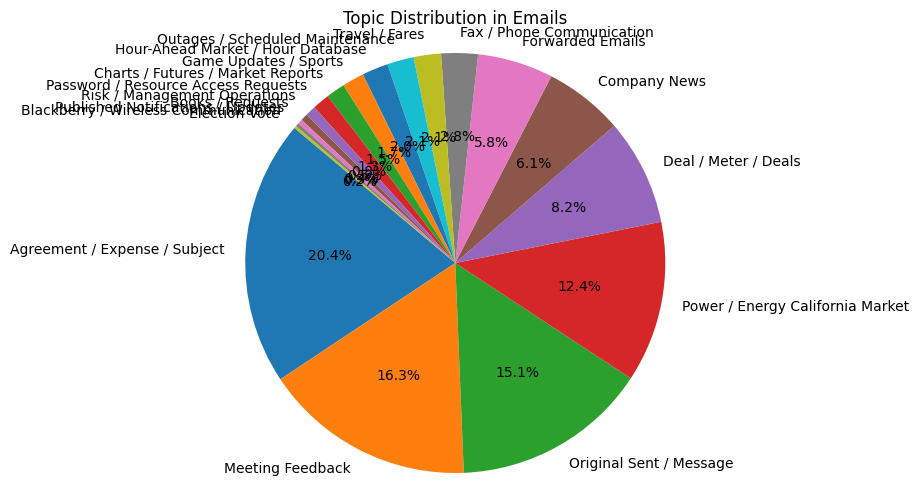

time: 1.15 s (started: 2025-03-29 13:35:23 +00:00)


In [ ]:
topic_counts = df_from_drive['predicted_topic'].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Topic Distribution in Emails')
plt.axis('equal')

plt.show()

##Next Emails

In [ ]:
def predict_new_email(new_email):
    new_email_vec = vectorizer.transform([new_email])

    predicted_topic = best_model.predict(new_email_vec)

    return predicted_topic[0]

time: 389 µs (started: 2025-03-26 13:50:39 +00:00)


###Preform tests on emails

In [ ]:
new_email = "The meeting was excellent"
predicted_topic = predict_new_email(new_email)

print(f"Predicted topic: {predicted_topic}")

Predicted topic: Meeting Feedback
time: 2.71 ms (started: 2025-03-26 13:51:15 +00:00)


In [ ]:
new_email = "The socerball game yesterday was good"
predicted_topic = predict_new_email(new_email)

print(f"Predicted topic: {predicted_topic}")

Predicted topic: Game Updates / Sports
time: 2.82 ms (started: 2025-03-26 13:52:53 +00:00)


In [ ]:
new_email = "I need to replace my password quickly, its dangerous for my account"
predicted_topic = predict_new_email(new_email)

print(f"Predicted topic: {predicted_topic}")

Predicted topic: Password / Resource Access Requests
time: 2.27 ms (started: 2025-03-26 13:53:41 +00:00)
